In [73]:
%config Completer.use_jedi = False

from field_importer import get_field
import mask
from cartoplot import cartoplot
from select_type import select_type
import numpy as np
import matplotlib.pyplot as plt
from regrid import regrid
from importlib import reload
from mask import select_region

In [20]:
lons, lats, mask = mask.get('lon'), mask.get('lat'), mask.get('mask')

2003
[-45552.576417032804] [-12575.719801952555]
89.57502544865207


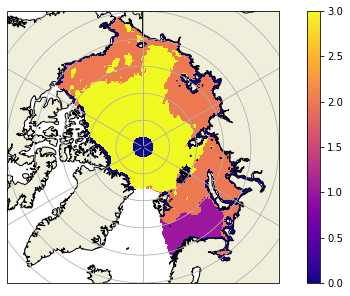

2004
[-51272.17609263835] [-27609.07922242418]
89.47631380866628


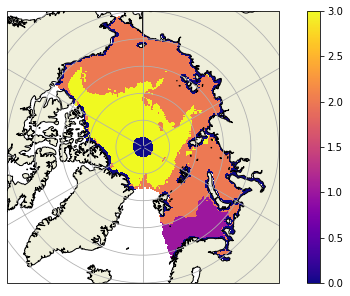

2005
[-52137.240439980946] [-13639.771714393748]
89.51535453821583


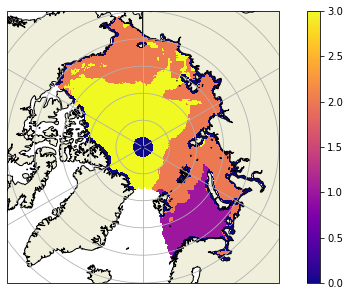

2006
[-61379.07480281804] [-10283.147649197299]
89.4403294297638


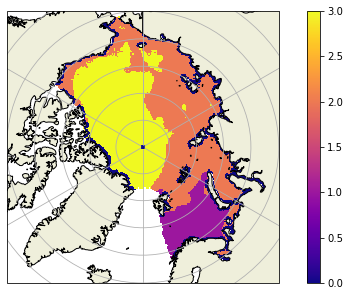

2007
[-53096.16453953488] [-31220.89498927014]
89.44608030761167


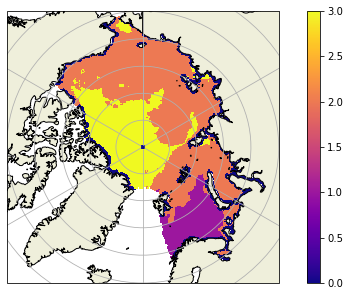

2008
[-51748.80259600893] [-15282.578366390588]
89.5147574624157


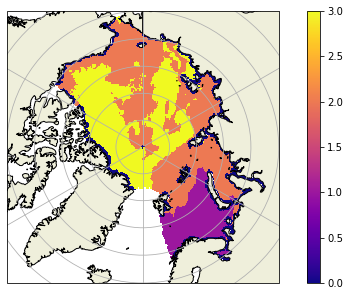

2009
[-54646.53833085655] [-24724.576061819356]
89.46060807956829


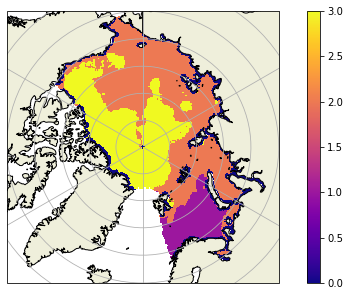

2010
[-56853.360782309865] [-8642.244086275103]
89.48284872651784


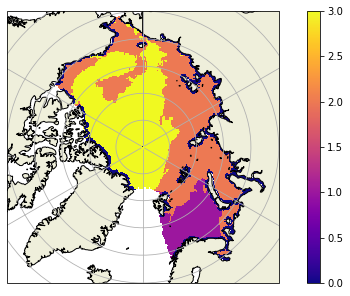

2011
[-54305.45809757051] [-33454.88918227432]
89.42640092053807


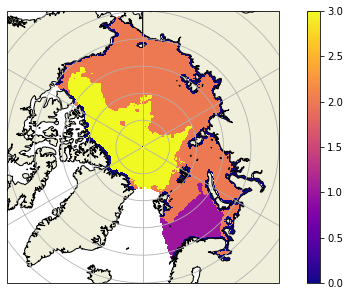

2012
[-58269.37750784568] [-26175.86769353734]
89.42554263177027


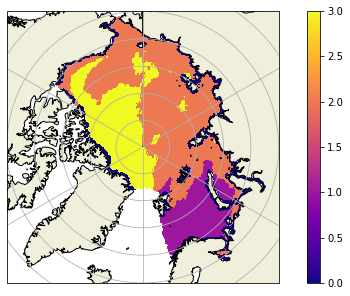

2013
[-57922.83935046677] [-30126.847064561207]
89.41285838228357


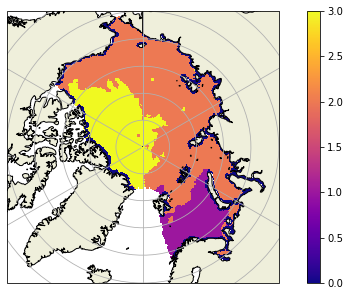

2014
[-62421.740738666944] [-11310.108352217678]
89.42950553864692


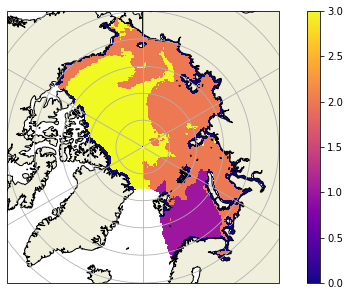

2015
[-61542.29408197631] [-23049.229687721985]
89.40901156484955


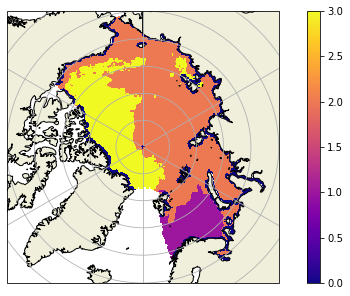

2016
[-55140.610338339044] [-24408.25736670501]
89.45771452793255


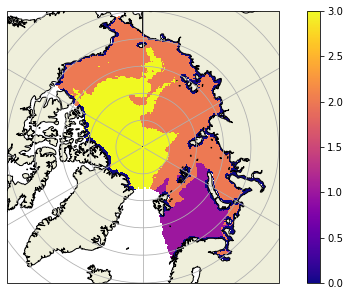

2017
[-54593.50806657407] [-17795.906996164325]
89.48361929409887


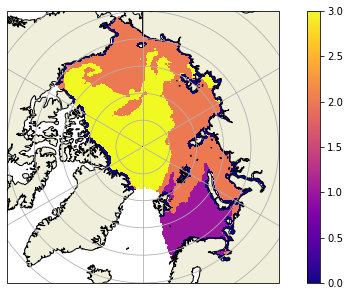

2018
[-57013.06630132585] [-26249.546251051604]
89.4355527520919


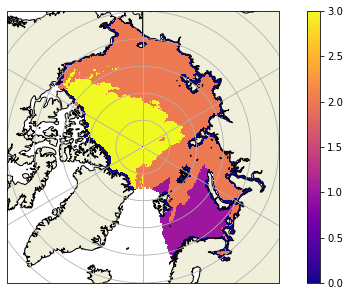

In [109]:
month  = '02'

fracs = []
coms = []
years = range(2003,2019)

for year in years:
    ice_type = get_field('cds_type',year=year,month=month,resolution=361,variable='type')['field']
    print(year)
    ice_type = select_region('basin',ice_type)
    com = get_MYI_COM(ice_type)[1][0]
    print(com)
    coms.append(com)
    
    cartoplot(lons,lats,ice_type,color_scale=(0,3))
    
    all_MYI = select_type('MYI',ice_type,year=year,month=month)
    
    beaufort_ice = select_region('Beaufort',ice_type)
    
    beaufort_MYI = select_type('MYI',beaufort_ice,year=year,month=month)
    
    beaufort_frac_MYI = np.nansum(beaufort_MYI)/np.nansum(all_MYI)
    
    fracs.append(beaufort_frac_MYI)
    
    

(89.2, 89.8)

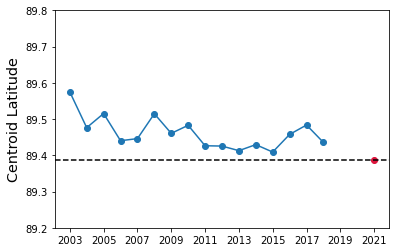

In [117]:
plt.plot(years,coms,marker='o')
# plt.scatter(2021,85.78,label='1st Dec')
plt.scatter(2021,89.387,label='1st Dec',color='crimson')
plt.axhline(89.387,color='k',ls='--')
plt.xticks(range(2003,2022,2))
plt.ylabel('Centroid Latitude',fontsize='x-large')
plt.ylim(89.2,89.8)

In [ ]:
import pickle

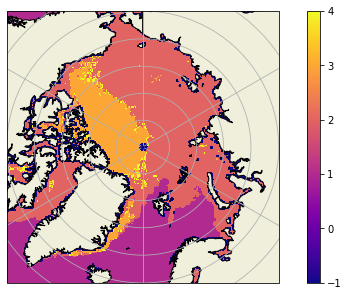

[-61557.78926795343] [-29143.187862140643]
([-64.66580966815701], [89.38750989155945])
8968.0
0.14674397859054417


In [111]:
today = pickle.load(open('/home/robbie/Dropbox/beaufort_sea/temporary_files/IT_20_2_21.p','rb'))

t_dat = regrid(today['dat'],today['lon'],today['lat'],lons,lats)

cartoplot(lons,lats,t_dat)

ice_type = t_dat

ice_type = select_region('basin',ice_type)

print(get_MYI_COM(ice_type))

all_MYI = select_type('MYI',ice_type,year=year,month=month)

beaufort_ice = select_region('Beaufort',ice_type)

beaufort_MYI = select_type('MYI',beaufort_ice,year=year,month=month)

print(np.nansum(all_MYI))

beaufort_frac_MYI = np.nansum(beaufort_MYI)/np.nansum(all_MYI)

print(beaufort_frac_MYI)

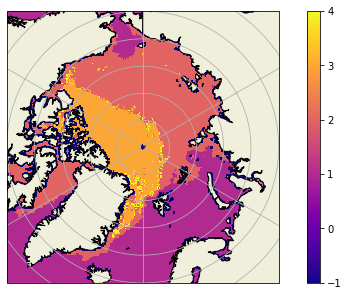

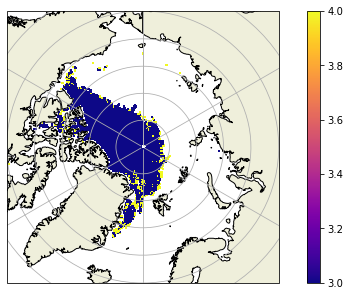

[-462688.1004139433] [76127.48295896627]


([-99.3433377916187], [85.78219845521286])

In [90]:
today = pickle.load(open('/home/robbie/Dropbox/beaufort_sea/temporary_files/IT_1_12_20.p','rb'))

t_dat = regrid(today['dat'],today['lon'],today['lat'],lons,lats)

cartoplot(lons,lats,t_dat)

ice_type = t_dat

all_MYI = np.ma.masked_where((ice_type<3), ice_type)
all_MYI = np.ma.filled(all_MYI,np.nan)

cartoplot(lons,lats,all_MYI)

get_MYI_COM(ice_type)

# beaufort_ice = select_region('Beaufort',ice_type)

# beaufort_MYI = select_type('MYI',beaufort_ice,year=year,month=month)

# print(np.nansum(all_MYI))

# beaufort_frac_MYI = np.nansum(beaufort_MYI)/np.nansum(all_MYI)

# print(beaufort_frac_MYI)

In [76]:
reload(tools)
import tools

In [79]:
from tools import lonlat_to_xy

In [83]:
def get_MYI_COM(ice_type):
    
    MYI_lats = np.ma.masked_where((ice_type<3), lats)
    MYI_lats = np.ma.filled(MYI_lats,np.nan)

    MYI_lons = np.ma.masked_where((ice_type<3), lons)
    MYI_lons = np.ma.filled(MYI_lons,np.nan)

    MYI_lons_real = [x for x in MYI_lons.ravel() if ~np.isnan(x)]
    MYI_lats_real = [x for x in MYI_lats.ravel() if ~np.isnan(x)]

    MYI_x, MYI_y = lonlat_to_xy(MYI_lons_real,MYI_lats_real,hemisphere='n')

    MYI_mean_x = np.mean(MYI_x)
    MYI_mean_y = np.mean(MYI_y)

    print([MYI_mean_x],[MYI_mean_y])

    com_lon, com_lat = lonlat_to_xy([MYI_mean_x],[MYI_mean_y],hemisphere='n',inverse=True)

    return(com_lon, com_lat)



[-462688.1004139433] [76127.48295896627]


([-99.3433377916187], [85.78219845521286])